In [1]:
import os

from ooi_data_explorations.common import get_vocabulary, load_kdata, update_dataset, ENCODINGS
from ooi_data_explorations.cabled.process_optaa import optaa_profiler

from matplotlib import pyplot as plt

In [2]:
# Setup needed parameters for the request, the user would need to vary these to suit their own needs and
# sites/instruments of interest. Site, node, sensor, stream and delivery method names can be obtained from the
# Ocean Observatories Initiative web site. The last two will set path and naming conventions to save the data
# to the local disk
site = 'CE04OSPS'                               # OOI Net site designator
node = 'SF01B'                                  # OOI Net node designator
sensor = '3B-OPTAAD105'                         # OOI Net sensor designator
stream = 'optaa_sample'                         # OOI Net stream name
method = 'streamed'                             # OOI Net data delivery method
tag = '*deployment0006*OPTAA*.nc'               # limit request to OPTAA NetCDF files from Deployment 6
level = 'profiler'                              # local directory name, level below site
instrmt = 'optaa'                               # local directory name, instrument below level

# OPTAA data is best downloaded from the local kdata directory (much faster than an M2M request)
vocab = get_vocabulary(site, node, sensor)[0]

In [3]:
%%time
optaa = load_kdata(site, node, sensor, method, stream, tag)

Loading and Processing Data Files: 100%|██████████| 11/11 [00:40<00:00,  3.71s/it]
CPU times: user 36.9 s, sys: 22.5 s, total: 59.5 s
Wall time: 58.6 s


In [4]:
%%time
# set up the calibration file path and name
cal_path = os.path.join(os.path.expanduser('~'), 'acs_workshop/data/reprocess', site.lower(), level, instrmt)
cal_path = os.path.abspath(cal_path)
if not os.path.exists(cal_path):
    os.makedirs(cal_path)

cal_file = ('{}.{}.{}.deploy06.cal_coeffs.json'.format(site.lower(), level, instrmt))
cal_file = os.path.join(cal_path, cal_file)

# clean-up and reorganize the profiler data
optaa = optaa_profiler(optaa, cal_file)

Determining profiler movement ...
Profiler moved during the deployment, treating data as a series of profiles.
Sub-selecting upcast data only from the data set ...
Creating and adding a profile variable to the data set ...
Smoothing and binning each profile into 25 cm depth bins ...: 100%|██████████| 179/179 [01:00<00:00,  2.98it/s]
Re-processing the raw data, creating intermediate data products ...


Converting attenuation data ...: 100%|██████████| 116223/116223 [00:20<00:00, 5679.01it/s]


CPU times: user 2min 51s, sys: 44.1 s, total: 3min 35s
Wall time: 4min 4s


In [5]:
optaa

<xarray.Dataset>
Dimensions:                       (time: 116223, wavelength_number: 100)
Coordinates:
  * time                          (time) datetime64[ns] 2019-06-14T19:28:18.0...
  * wavelength_number             (wavelength_number) int64 0 1 2 3 ... 97 98 99
Data variables: (12/38)
    external_temp_raw             (time) int64 40771 40855 40856 ... 39019 40208
    deployment                    (time) int64 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6
    lat                           (time) float64 44.37 44.37 ... 44.37 44.37
    sea_water_pressure            (time) float64 198.4 193.4 ... 26.28 195.2
    elapsed_run_time              (time) float64 3.538e+05 ... 3.73e+06
    lon                           (time) float64 -125.0 -125.0 ... -125.0 -125.0
    ...                            ...
    wavelength_c                  (time, wavelength_number) float64 399.8 ......
    c_signal                      (time, wavelength_number) int64 1086 ... -9...
    c_reference                   (time, wavelength_number) int64 1312 ... -9...
    beam_attenuation              (time, wavelength_number) float64 nan ... nan
    cpg                           (time, wavelength_number) float64 0.1677 .....
    cpg_ts                        (time, wavelength_number) float64 nan ... nan
Attributes: (12/67)
    node:                               SF01B
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  streamed
    stream:                             optaa_sample
    ...                                 ...
    geospatial_lon_max:                 -124.956429
    geospatial_lon_units:               degrees_east
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down

In [6]:
# split the data into profiles using the profile variable added in the above processing
profiles = optaa.groupby('profile')
profiles[30]

<xarray.Dataset>
Dimensions:                       (time: 671, wavelength_number: 100)
Coordinates:
  * time                          (time) datetime64[ns] 2019-07-10T07:22:07.0...
  * wavelength_number             (wavelength_number) int64 0 1 2 3 ... 97 98 99
Data variables: (12/38)
    external_temp_raw             (time) int64 40615 40614 40615 ... 39161 39149
    deployment                    (time) int64 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6
    lat                           (time) float64 44.37 44.37 ... 44.37 44.37
    sea_water_pressure            (time) float64 193.6 193.4 ... 24.93 24.76
    elapsed_run_time              (time) float64 7.621e+04 ... 3.774e+06
    lon                           (time) float64 -125.0 -125.0 ... -125.0 -125.0
    ...                            ...
    wavelength_c                  (time, wavelength_number) float64 399.8 ......
    c_signal                      (time, wavelength_number) int64 1052 ... -9...
    c_reference                   (time, wavelength_number) int64 1278 ... -9...
    beam_attenuation              (time, wavelength_number) float64 nan ... nan
    cpg                           (time, wavelength_number) float64 0.1913 .....
    cpg_ts                        (time, wavelength_number) float64 nan ... nan
Attributes: (12/67)
    node:                               SF01B
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  streamed
    stream:                             optaa_sample
    ...                                 ...
    geospatial_lon_max:                 -124.956429
    geospatial_lon_units:               degrees_east
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down

In [7]:
nc_file = ('{}.{}.{}.deploy06.reprocessed.nc'.format(site.lower(), level, instrmt))
nc_file = os.path.join(cal_path, nc_file)
optaa.to_netcdf(nc_file, mode='w', format='NETCDF4', engine='h5netcdf')

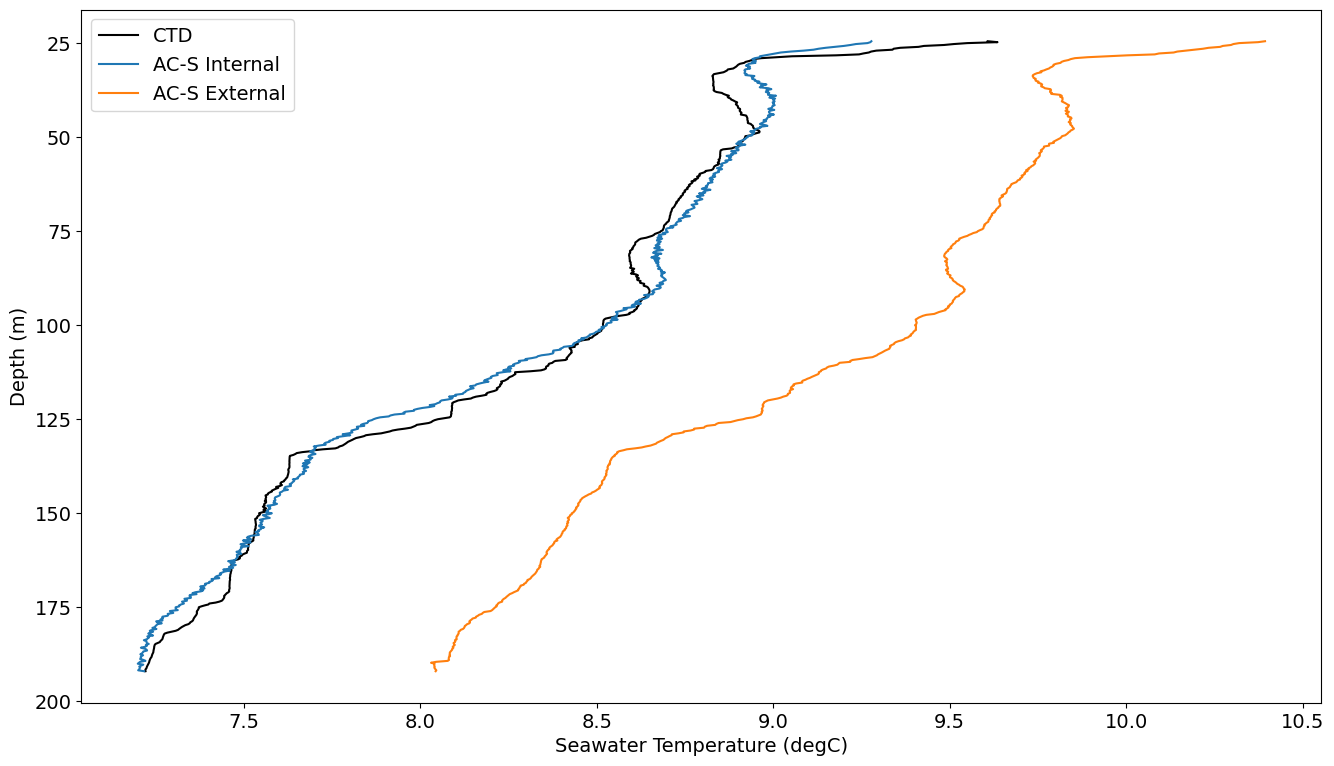

In [8]:
%matplotlib inline

# Plot the instrument and co-located CTD temperature records for profile 10
profile = profiles[30]
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(16,9))
plt.plot(profile['sea_water_temperature'], profile['depth'], '-k', label='CTD')
plt.plot(profile['internal_temp'], profile['depth'], label='AC-S Internal')
plt.plot(profile['external_temp'], profile['depth'], label='AC-S External')
plt.gca().invert_yaxis()
plt.xlabel('Seawater Temperature (degC)')
plt.ylabel('Depth (m)')
plt.legend()

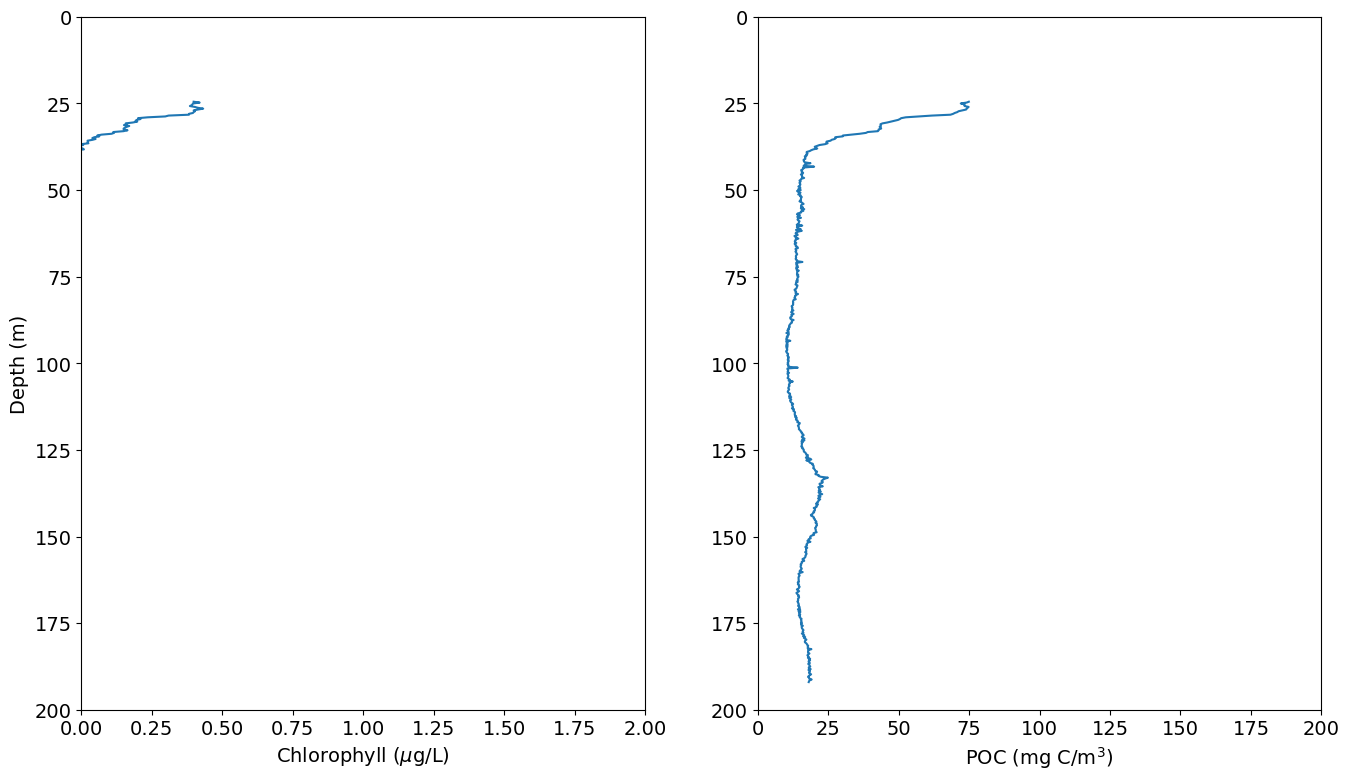

In [9]:
# plot the estimated chlorophyll and POC concentrations
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(16,9))

ax1 = plt.subplot(121)
plt.plot(profile['estimated_chlorophyll'], profile['depth'])
plt.xlabel('Chlorophyll ($\mu$g/L)')
plt.ylabel('Depth (m)')
plt.xlim([0, 2])
plt.ylim([0, 200])

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(profile['estimated_poc'], profile['depth'])
plt.xlabel('POC (mg C/m$^3$)')
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.gca().invert_yaxis()
plt.show()

Text(0.5, 1.0, 'Recalculated Attenuation Data')

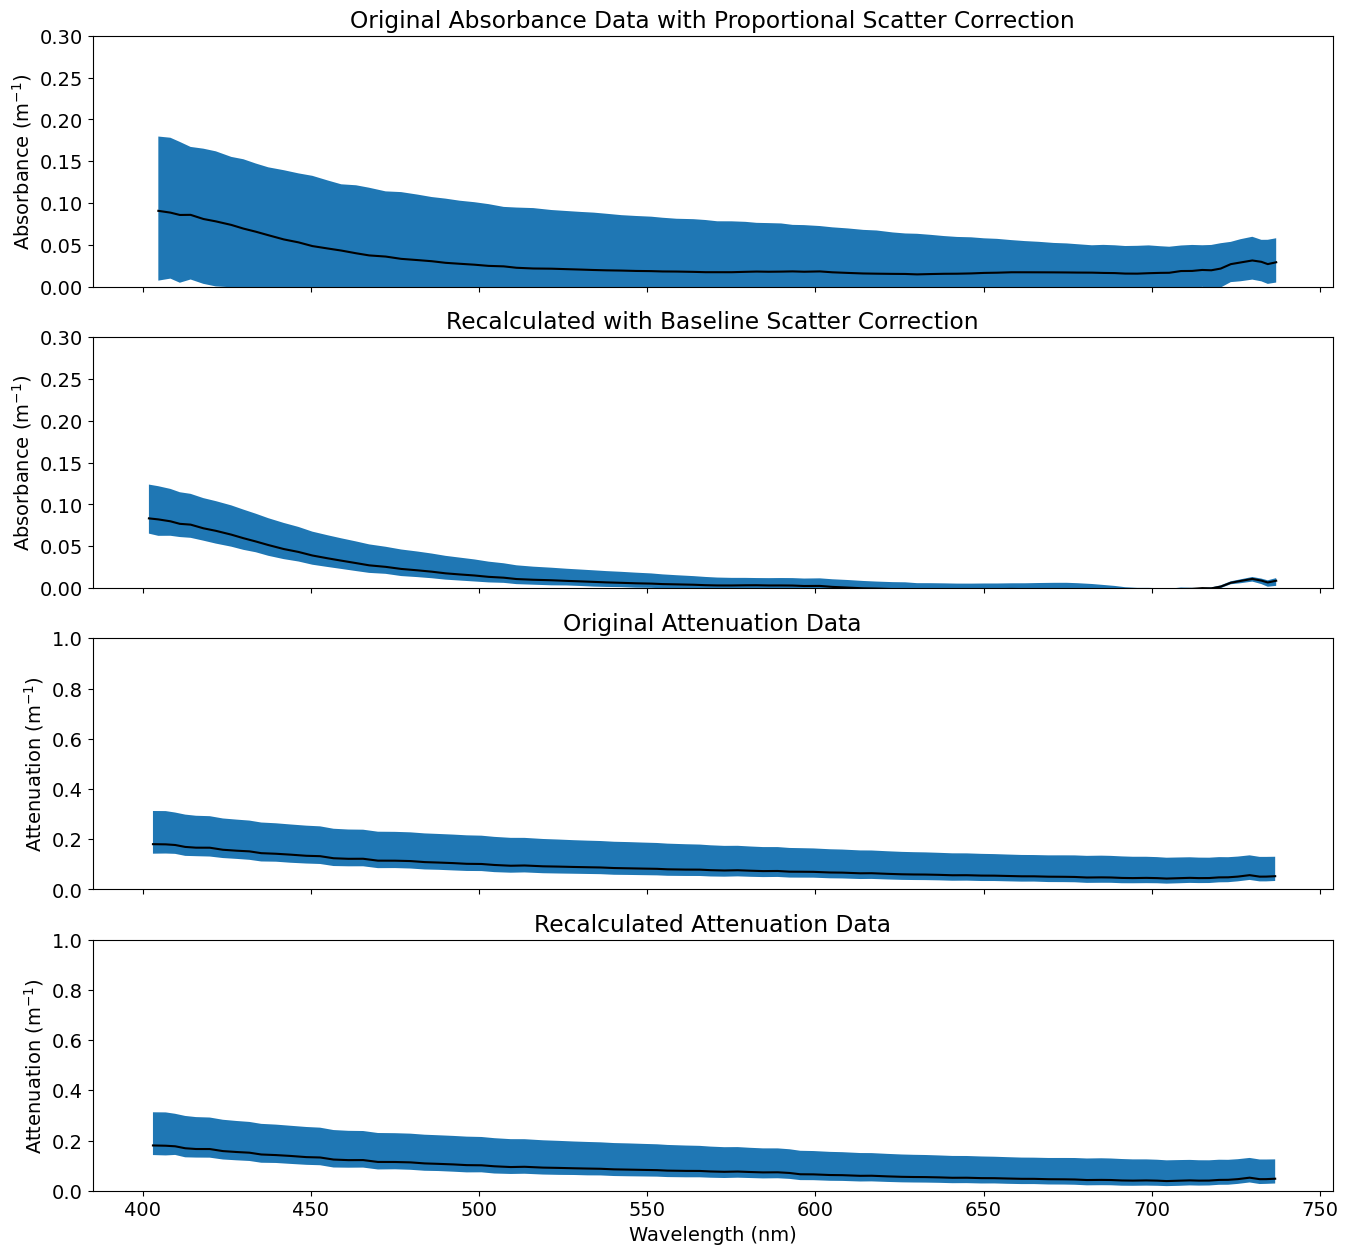

In [10]:
# plot the optical absortion and attenuation spectra (as calculated by OOI and as recalculated here)
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(16,15))

ax1 = plt.subplot(411)
plt.plot(profile['wavelength_a'][0, :], profile['optical_absorption'].mean(axis=0), '-k')
plt.fill_between(profile['wavelength_a'][0, :], profile['optical_absorption'].min(axis=0), 
                 profile['optical_absorption'].mean(axis=0) + profile['optical_absorption'].std(axis=0) * 3)
plt.ylim([0, 0.3])
plt.ylabel('Absorbance (m$^{-1}$)')
plt.title('Original Absorbance Data with Proportional Scatter Correction')
plt.setp(ax1.get_xticklabels(), visible=False) # turn off x-axis ticklabels

ax2 = plt.subplot(412, sharex=ax1)
plt.plot(profile['wavelength_a'][0, :], profile['apg_ts_s'].mean(axis=0), '-k')
plt.fill_between(profile['wavelength_a'][0, :], profile['apg_ts_s'].min(axis=0), 
                 profile['apg_ts_s'].mean(axis=0) + profile['apg_ts_s'].std(axis=0) * 3)
plt.ylim([0, 0.3])
plt.ylabel('Absorbance (m$^{-1}$)')
plt.title('Recalculated with Baseline Scatter Correction')
plt.setp(ax2.get_xticklabels(), visible=False) # turn off x-axis ticklabels

ax3 = plt.subplot(413, sharex=ax1)
plt.plot(profile['wavelength_c'][0, :], profile['beam_attenuation'].mean(axis=0), '-k')
plt.fill_between(profile['wavelength_c'][0, :], profile['beam_attenuation'].min(axis=0), 
                 profile['beam_attenuation'].mean(axis=0) + profile['beam_attenuation'].std(axis=0) * 3)
plt.ylim([0, 1])
plt.ylabel('Attenuation (m$^{-1}$)')
plt.title('Original Attenuation Data')
plt.setp(ax3.get_xticklabels(), visible=False) # turn off x-axis ticklabels

ax4 = plt.subplot(414, sharex=ax1)
plt.plot(profile['wavelength_c'][0, :], profile['cpg_ts'].mean(axis=0), '-k')
plt.fill_between(profile['wavelength_c'][0, :], profile['cpg_ts'].min(axis=0), 
                 profile['cpg_ts'].mean(axis=0) + profile['cpg_ts'].std(axis=0) * 3)
plt.ylim([0, 1])
plt.ylabel('Attenuation (m$^{-1}$)')
plt.xlabel('Wavelength (nm)')
plt.title('Recalculated Attenuation Data')

In [11]:
# create a slice at 10 m for the entire deployment
slice10 = optaa.where((optaa['depth'] >= 9.75) & (optaa['depth'] <= 10.25), drop=True)

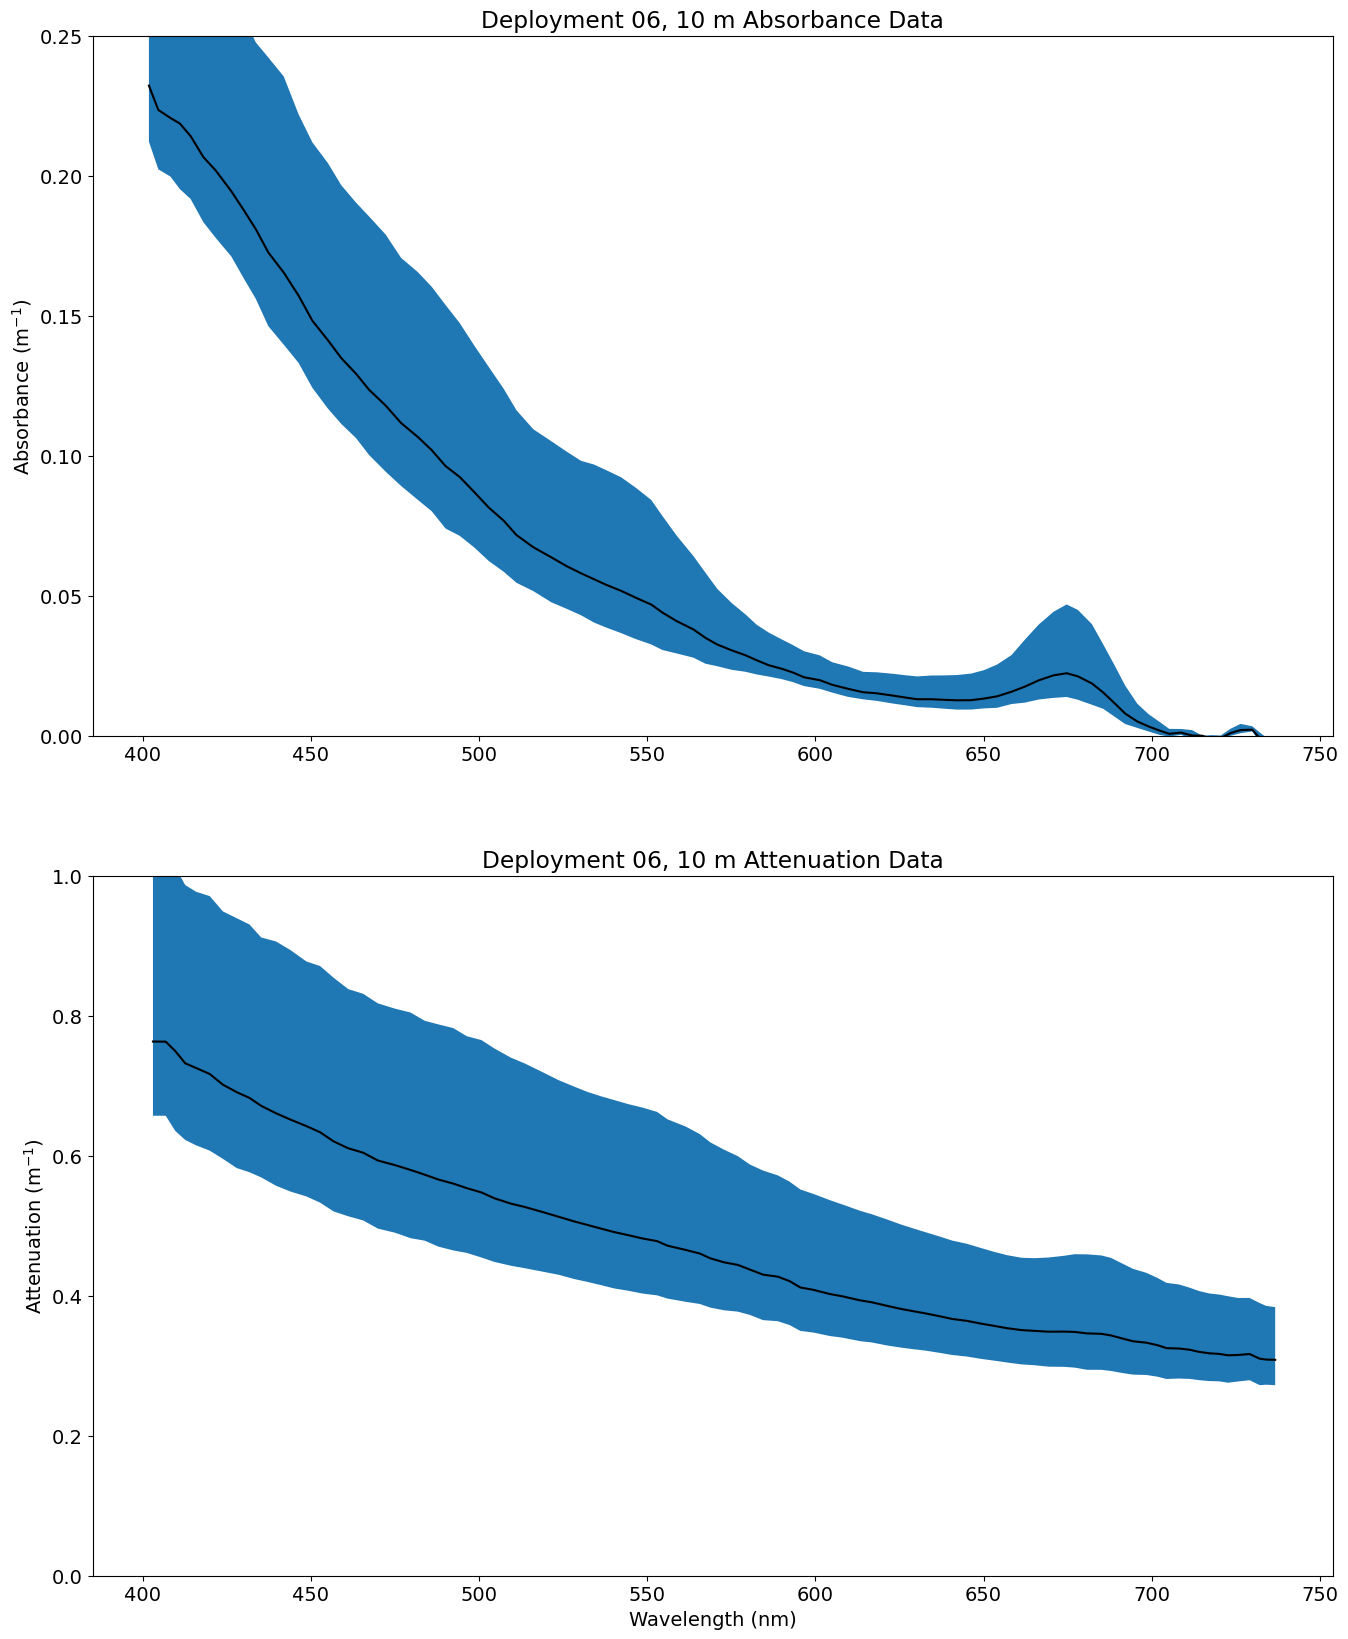

In [12]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(16,20))

ax1 = plt.subplot(211)
plt.plot(slice10['wavelength_a'][0, :], slice10['apg_ts_s'].mean(axis=0), '-k')
plt.fill_between(slice10['wavelength_a'][0, :], slice10['apg_ts_s'].min(axis=0), 
                 slice10['apg_ts_s'].mean(axis=0) + (slice10['apg_ts_s'].std(axis=0) * 3))
plt.ylim([0, 0.25])
plt.title('Deployment 06, 10 m Absorbance Data')
plt.ylabel('Absorbance (m$^{-1}$)')
plt.setp(ax2.get_xticklabels(), visible=False) # turn off x-axis ticklabels

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(slice10['wavelength_c'][0, :], slice10['cpg_ts'].mean(axis=0), '-k')
plt.fill_between(slice10['wavelength_c'][0, :], slice10['cpg_ts'].min(axis=0), 
                 slice10['cpg_ts'].mean(axis=0) + (slice10['cpg_ts'].std(axis=0) * 3))
plt.ylim([0, 1])
plt.title('Deployment 06, 10 m Attenuation Data')
plt.ylabel('Attenuation (m$^{-1}$)')
plt.xlabel('Wavelength (nm)')
plt.show()